**DATA SPLITING**

We will not train any model here, but we will follow the standard AI nomenclature to get used to it.

**Why Do We Split Data in AI Problems?**

In machine learning and artificial intelligence, we divide data into different sets to ensure our model **learns effectively** and **generalizes well** to new data. The most common splits are:

- **Training Data**: This is the largest portion of the dataset, used to train the model. The model learns patterns and relationships from this data.
- **Testing Data**: A separate portion of the dataset, **not** used during training. This data is used to evaluate the model’s performance on unseen data, helping to check for overfitting.
- **Validation Data (Optional)**: Sometimes, we use a third dataset to fine-tune hyperparameters and improve model performance before final testing.

A common split is **80% training, 20% testing**, or **70% training, 15% validation, 15% testing**, depending on the problem.

---

## Investigating the Relationship Between Energy Consumption and Building Floors

**Scenario**

The objective is to examine whether a city's energy consumption increases with the average number of floors in its buildings. To explore this relationship, we will use a dataset obtained from Kaggle.  

Although the dataset lacks details regarding its source or collection process, it is straightforward and relevant for analysis. The dataset contains only two variables: the average number of floors in buildings and the corresponding energy consumption.  


Import everything we need:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Management

## Load and Visualize Data

Use the method `read_csv`to load the information of the file 2-buildings_energy_consuption.csv

In [2]:
data=pd.read_csv('2-buildings_energy_consuption.csv')

To get a quick glimpse of the dataset, we can use Pandas' `head()` function to display the first few rows.  


In [3]:
data.head()

,NumberFloors,EnergyConsuption
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Next, we can use the `info()` method to get a concise summary of the DataFrame. This summary reveals that the dataset contains **30 records**, has **no missing values**, and both variables are stored as **float data types**.  


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NumberFloors      30 non-null     float64
 1   EnergyConsuption  30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


Now, let's explore the dataset's statistical properties using the `describe()` function. This provides a summary of key metrics, including central tendency, dispersion, and distribution characteristics.  


In [5]:
data.describe()

,NumberFloors,EnergyConsuption
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


From the dataset, we can observe that the surveyed households have an average of **5.31 floors**, with an **average energy consumption of 76,003 kWh** per year. Additionally, **75% of the households consume more than 56,720 kWh** annually. This suggests that even with a moderate number of floors, energy consumption remains relatively high.  

Before fitting a linear regression model, we need to examine the relationship between these two variables. Let’s visualize **Number of Floors** against **Energy Consumption of Houses (kWh)** to identify any trends with a **scattered plot**:  

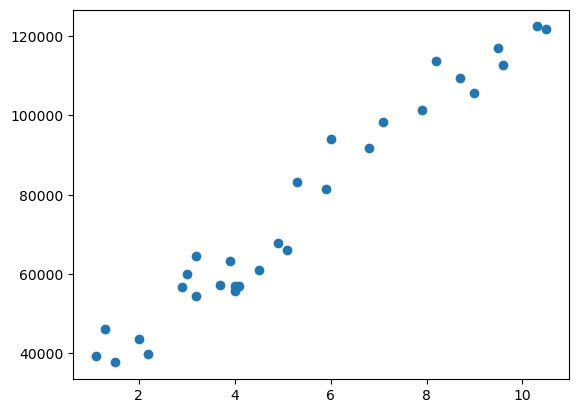

In [6]:
plt.scatter('NumberFloors','EnergyConsuption',data=data)

From the visualization, there appears to be a correlation between the **number of floors** and **energy consumption**. The trend suggests that as the number of floors increases, energy consumption also rises, following a roughly linear pattern.  

To confirm this relationship, we can calculate the **Pearson correlation coefficient** using NumPy’s `corrcoef()` function. Print the result:


In [7]:
pears_corr_coef = np.corrcoef(data.NumberFloors, data.EnergyConsuption)
print(pears_corr_coef)

[[1.         0.97824162]
 [0.97824162 1.        ]]


The two variables show a strong positive correlation. However, remember: **correlation does not necessarily imply causation**.

## Split Data

We will not train any model here, but we will follow the standard AI nomenclature to get used to it.

**Why Do We Split Data in AI Problems?**

In machine learning and artificial intelligence, we divide data into different sets to ensure our model **learns effectively** and **generalizes well** to new data. The most common splits are:

- **Training Data**: This is the largest portion of the dataset, used to train the model. The model learns patterns and relationships from this data.
- **Testing Data**: A separate portion of the dataset, **not** used during training. This data is used to evaluate the model’s performance on unseen data, helping to check for overfitting.
- **Validation Data (Optional)**: Sometimes, we use a third dataset to fine-tune hyperparameters and improve model performance before final testing.

A common split is **80% training, 20% testing**, or **70% training, 15% validation, 15% testing**, depending on the problem.

---

Divide the dataset into two variables: **X (Number of Floors)** as the independent variable and **Y (Energy Consumption of Houses #)**.

In [8]:
# Split the data in two variables
X = data['NumberFloors']
Y = data['EnergyConsuption']

Split the data into training (80%) and testing (20%) sets using the `sample` and `drop` methods. Scikit-Learn offers the `train_test_split` method for this task.

```python
### Sintaxis:

df.sample(frac=proportion, random_state=seed)

### Explanation:

sample(frac=0.8) # Randomly selects 80% of the data from the array.  
random_state=200 # Sets a fixed random seed to ensure reproducibility.  


### Example: Given xvariable:

x_train = xvariable.sample(frac=0.8, random_state=200) # Randomly selects **80%** of the rows from xvariable.  
x_test  = xvariable.drop(x_train.index) # → Removes the training set rows from X, creating the test set.  




In [9]:
# Split into a training (80%) and testing (20%) sets

X_train = X.sample(frac=0.8,random_state=200)
X_test  = X.drop(X_train.index)
Y_train = Y.sample(frac=0.8,random_state=200)
Y_test  = Y.drop(Y_train.index)

Convert DataFrames to Numpy arrays. Use `to_numpy()` method.

In [10]:
X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test  = Y_test.to_numpy()

Visualize a scatter plot of the two sets. Use `subplot`. 

**Hint**, use this order:

```python
# Training set
plt.figure 
plt.subplot 
plt.scatter 
plt.title 

# Testing set
plt.subplot 
plt.scatter 
plt.title 
plt.show()

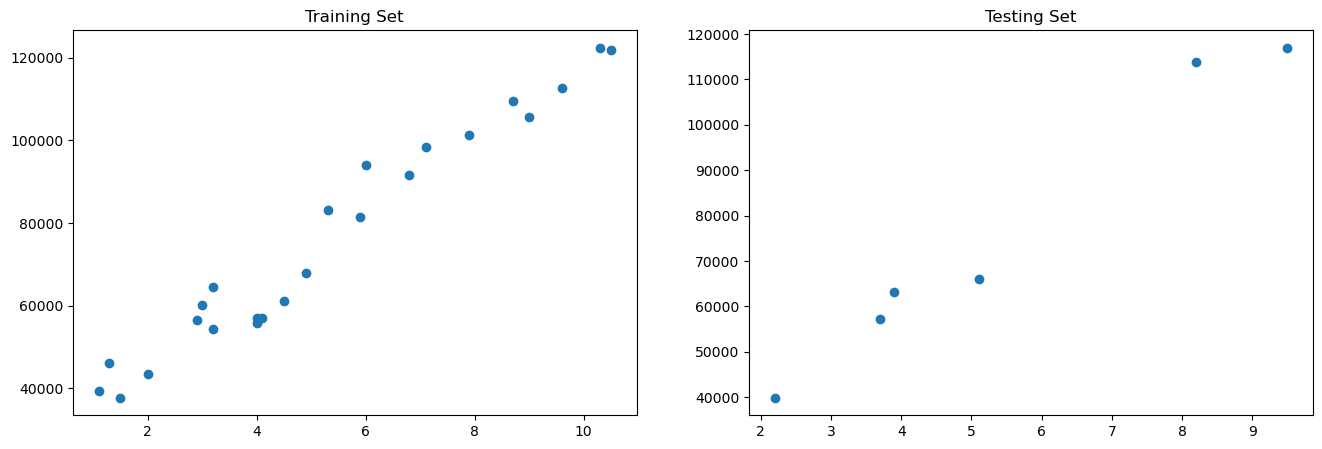

In [11]:
# Training set
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(x=X_train, y=Y_train)
plt.title('Training Set')

# Testing set
plt.subplot(1,2,2)
plt.scatter(x=X_test, y=Y_test)
plt.title('Testing Set')
plt.show()

# Train the Linear Regression Model  

(we are not training anything since this problem has analytical solution)


Manually implement linear regression instead of using Scikit-Learn. We use the term "train" to follow the AI nomenclature, but this problem has an analytical solution.

Remember:

- $x^{(i)} \in \mathbb{R}$,  $i$-th input value. $\bigg[x^{(1)} \quad  \cdots \quad  x^{(m)}  \bigg]$.
- $y^{(i)} \in \mathbb{R}$, $i$-th output value. $\bigg[y^{(1)} \quad  \cdots \quad  y^{(m)}  \bigg]$.


- $\hat{y}^{(i)} = w x^{(i)} + b$: Predicted value for input $x^{(i)}$.
 
- $m$: Number of training examples.


If we define the Loss Function to be the Mean Squared Error:
\begin{equation}
    MSE = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
\end{equation}

The linear regression problem has the following analytical solution:

\begin{equation}
    w = \frac{\displaystyle \sum_{i=1}^{m} (x^{(i)} - \bar{x})(y^{(i)} - \bar{y})}{\displaystyle \sum_{i=1}^{m} (x^{(i)} - \bar{x})^2}, \qquad \qquad b = \bar{y} - w \bar{x}
\end{equation}

Create a function that:  

1) Computes the mean of **x** and **y**.  
2) Calculates the slope **weights** (w).  
3) Computes the intercept **bias** (b).  
4) Trains the model using the training set (compute $\hat{y}^{(i)}$).
5) Compute the Mean Squared Error (MSE) for the training data.  
6) Evaluate the model on the test set.
7) Compute the Mean Squared Error (MSE) of the test set.
8) Optional: Compute the $R^2$ coeficient.

The coefficient of determination, denoted as $R^2$, is calculated using the following formulas:

Residual Sum of Squares (SSR or $SS_{res}$)
\begin{equation}
SS_{res} = \sum (Y_{\text{train}} - Y_{\text{pred\_train}})^2
\end{equation}

Total Sum of Squares (SST or $SS_{tot}$)
\begin{equation}
SS_{tot} = \sum (Y_{\text{train}} - \bar{Y})^2
\end{equation}

Coefficient of Determination ($R^2$) when using Ordinary Least Squares
\begin{equation}
R^2 = 1-\frac{SS_{res}}{SS_{tot}}
\end{equation}

In [12]:
def linear_regression(X_train, Y_train, X_test, Y_test):
    """
    Perform simple linear regression from scratch.

    Parameters:
    X_train, Y_train - Training data (independent and dependent variables)
    X_test, Y_test - Test data (independent and dependent variables)

    Returns:
    b - bias of the regression line
    w - weigths of the regression line
    training_error - Mean Squared Error (MSE) on training data
    test_error - Mean Squared Error (MSE) on test data
    R2 - R-squared value (how well the model explains the variance)
    """

    m_train = len(Y_train)
    m_test = len(Y_test)
    
    # Step 1: Compute the means of X and Y
    X_mean = X_train.mean()
    Y_mean = Y_train.mean()

    # Step 2: Calculate the weights (w)
    numerator = sum((X_train - X_mean) * (Y_train - Y_mean))
    denominator = sum((X_train - X_mean) ** 2)
    w = numerator / denominator

    # Step 3: Calculate the bias (b)
    b = Y_mean - (w * X_mean)

    # Step 4: Make predictions on the training set
    Y_pred_train = b + (w * X_train)

    # Step 5: Compute Mean Squared Error (MSE) for training data
    training_error = sum((Y_train - Y_pred_train) ** 2) / m_train

    # Step 6: Make predictions on the test set
    Y_pred_test = b + (w * X_test)

    # Step 7: Compute Mean Squared Error (MSE) for test data
    test_error = sum((Y_test - Y_pred_test) ** 2) / m_test

    # Step 8: Compute R-squared value (coefficient of determination)
    residual_sum = sum((Y_train - Y_pred_train) ** 2)
    total_sum = sum((Y_train - Y_mean) ** 2)
    
    R2 = 1 - residual_sum / total_sum

    return b, w, training_error, test_error, R2

In [13]:
b,w, training_error, test_error, R2 = linear_regression(X_train,Y_train,X_test,Y_test)

print(f"The Linear Regresion equation is: Y = {b} + {w}*X")

The Linear Regresion equation is: Y = 27767.627741379292 + 9121.127241379312*X


# Model Evaluation

Now that the model has been tranined, evaluate its performance:

**<u> Accuracy <u>**

Use the **MSE (Mean Squared Error)**.

- MSE measures how well the model fits the data. A lower MSE indicates better performance.  

  - MSE on the **training set** shows how well the model fits **known** data.

  - MSE on the **test set** indicates how well the model **generalizes to new data**.


**<u> Explainability <u>**

Use the R² **(Coefficient of Determination)**.

- R² measures how well the independent variable explains the variance in the dependent variable. It ranges from **0 to 1**, where:

  - **R² = 1** → The model perfectly explains the variance in the data.
  - **R² = 0** → The model explains none of the variance.

A higher R² value indicates a better fit, but a very high value may suggest overfitting.

In [14]:
print("=" * 40)
print(" Model Evaluation Results ".center(40, "="))
print("=" * 40)
print(f"Training MSE : {training_error:.4f}")
print(f"Test MSE     : {test_error:.4f}")
print("=" * 40)
print(f"R2           : {R2:.4f}")
print("=" * 40)


======= Model Evaluation Results =======
Training MSE : 28410638.3404
Test MSE     : 47181762.6393
R2           : 0.9593


The training mean squared error (MSE) is lower than the test MSE, which is expected. The model was trained on the training set, so it fits that data better. The test set contains unseen data, making the error naturally higher.


95.93% of the variation in Energy Consumption is explained by the number of floors of the houses. This suggests that the linear model fits the data well. However, other factors beyond the number of floors may also influence the Energy Consumption.

Plot the original data and the obtained linear function 

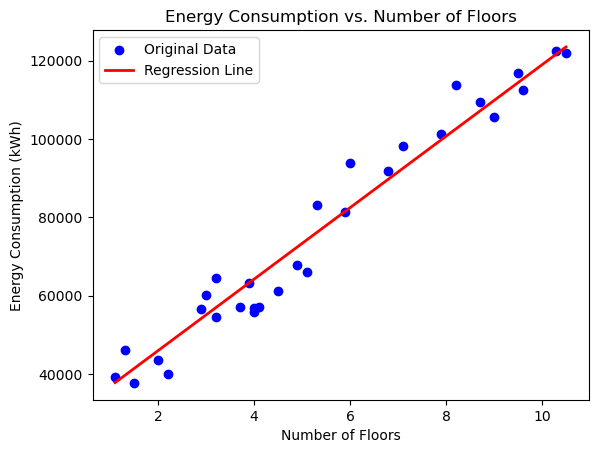

In [15]:
import matplotlib.pyplot as plt

# Scatter plot of original data
plt.scatter(data['NumberFloors'], data['EnergyConsuption'], color='blue', label='Original Data')

# Generate predictions for the regression line
X_range = np.linspace(data['NumberFloors'].min(), data['NumberFloors'].max(), 100)  # Create a range of X values
Y_pred = b + (w * X_range)  # Compute predicted energy consumption

# Plot the regression line
plt.plot(X_range, Y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Number of Floors')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption vs. Number of Floors')
plt.legend()

# Show the plot
plt.show()

The residuals $\epsilon = y^{(i)}-y^{(i)}$ must follow a normal distribution.

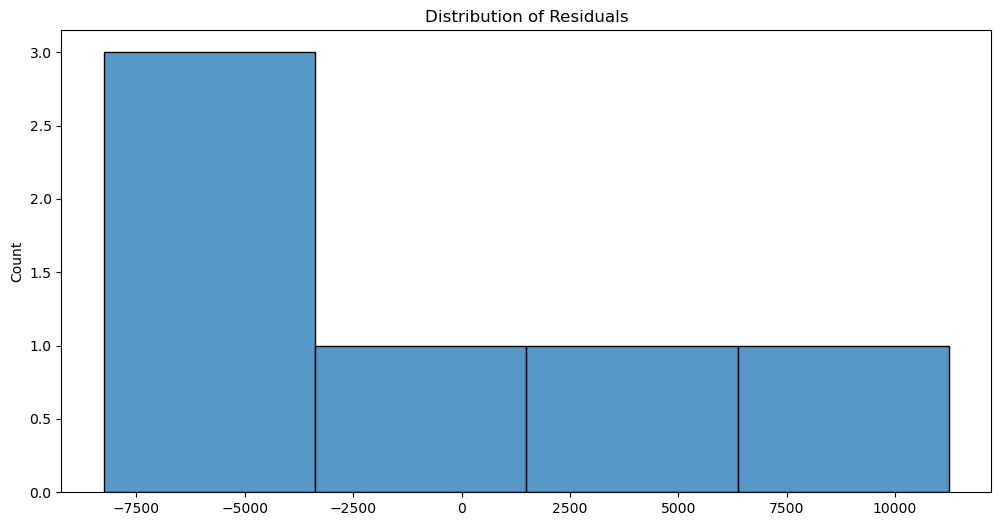

In [16]:
Y_pred_test = b + (w * X_test)

residuals = Y_test - Y_pred_test

plt.subplots(figsize=(12, 6))

plt.title('Distribution of Residuals')

sns.histplot(residuals)

plt.show()

We have to few data to obtain a conclusion.

The variance of the residuals must remain constant.

Linear regression models depend on the assumption of homoscedasticity, meaning the error term (random noise or disturbance in the relationship between independent and dependent variables) maintains a consistent variance across all values of the independent variable.

We plot our residuals against the anticipated values to observe the variation of the errors.

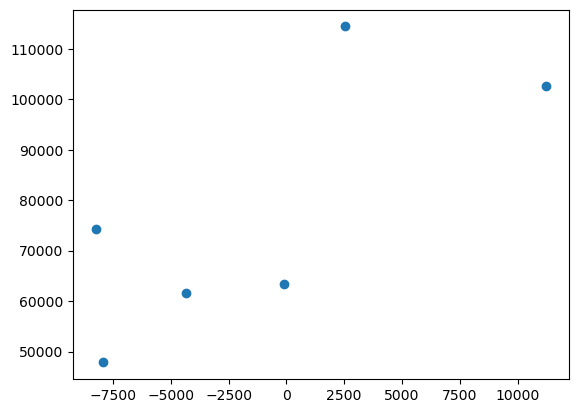

In [17]:
plt.scatter(residuals, Y_pred_test)
plt.show()

# Prediction

Use the trained linear model to make predictions manually.  

Create a function that applies the model:  
- **Input:** `X` (independent variable) → Number of Floors  
- **Output:** `Y` (dependent variable) → Predicted Energy Consumption of a House (kWh)  

---

Define a function that given some number of Floors predicts what the Energy Consuption will be.

- Name: energy_consumption_prediction.
- Inputs: Number of Floors.
- Outputs: Predicted Energy Consumption of Houses (kWh).

In [18]:
def energy_consumption_prediction(X):
    """
    Predicts the Energy Consumption of Houses (kWh) based on the Number of Floors.

    Parameters:
    X (float, int, or array-like): The number of floors in the house.

    Returns:
    str: Formatted prediction output.
    """
    y = b + (w * np.array(X))  # Apply the linear regression formula: y = b + w * X
    return f"Predicted Energy Consumption (kWh) for houses with {X} floor(s): {y}."

Make some predictions

In [19]:
print(energy_consumption_prediction(5))  # Single value


Predicted Energy Consumption (kWh) for houses with 5 floor(s): 73373.26394827585.


In [20]:
print(energy_consumption_prediction([1.2, 12.3, 5, 7.8]))  # Array of values

Predicted Energy Consumption (kWh) for houses with [1.2, 12.3, 5, 7.8] floor(s): [ 38712.98043103 139957.49281034  73373.26394828  98912.42022414].


# Loss Functions

- Define a one function for each of the the following Loss Functions.
- Define a function that calls all the loss functions for the linear regression example.

- Mean Squared Error (MSE) of Squared $L^2$ Loss

\begin{equation}
    \mathcal{L} (\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left(y^{(i)} - \hat{y}^{(i)}(\boldsymbol{\theta}) \right)^2  
\end{equation}

In [21]:
# Mean Squared Error (MSE)
def mse_loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)

- Mean Absolute Error (MAE) or $L^1$ Loss\begin{equation}
    \mathcal{L} (\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left| y^{(i)} - \hat{y}^{(i)}(\boldsymbol{\theta}) \right| 
\end{equation}

In [22]:
# Mean Absolute Error (MAE)
# write your code here

- Huber Loss or Smooth Mean Absolute Error

\begin{equation}
    \mathcal{L} (\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} 
    \begin{cases} 
      \frac{1}{2} \left( y^{(i)} - \hat{y}^{(i)}(\boldsymbol{\theta}) \right)^2, & \text{if } \left| y^{(i)} - \hat{y}^{(i)}(\boldsymbol{\theta}) \right| \leq \delta \\[3mm]
      \delta \left( \left| y^{(i)} - \hat{y}^{(i)}(\boldsymbol{\theta}) \right| - \frac{\delta}{2} \right), & \text{otherwise}.
    \end{cases}
\end{equation}

In [23]:
# Huber Loss
# write your code here

- Log-Cosh Loss
\begin{equation}
    \mathcal{L} (\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \log \left[ \cosh \left( y^{(i)} - \hat{y}^{(i)}(\boldsymbol{\theta}) \right) \right]
\end{equation}

In [24]:
# Cosh Loss
# write your code here

- Binary Cross-Entropy Loss (BCE)
\begin{equation}
    \mathcal{L} (\boldsymbol{\theta}) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log \hat{y}^{(i)}(\boldsymbol{\theta}) + \left( 1 - y^{(i)} \right) \log \left( 1 - \hat{y}^{(i)}(\boldsymbol{\theta}) \right) \right]
\end{equation}

In [25]:
# Binary Cross-Entropy Loss
# write your code here

- Hinge Loss
\begin{equation}
    \mathcal{L} (\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \max \left( 0, 1 - y^{(i)} \hat{y}^{(i)}(\boldsymbol{\theta}) \right)
\end{equation}

In [26]:
# Hinge Loss (for SVM or similar)
# write your code here

- Kullback-Leibler (KL) Divergence
\begin{equation}
    \mathcal{L} (\boldsymbol{\theta}) = \sum_{i} y^{(i)} \log \left( \frac{y^{(i)}}{\hat{y}^{(i)}(\boldsymbol{\theta})} \right)
\end{equation}

In [27]:
# Kullback-Leibler Divergence Loss
# write your code here

- Define a function that calls all the loss functions and print them

In [28]:
# Function to compute and display all losses in a DataFrame
def compute_and_display_losses(y, y_hat, delta=1.0):

    # write your code here

    




- Example

In [31]:
# Example input data
y = np.array([0, 1, 0, 1])  # True values
y_hat = np.array([0.1, 0.9, 0.2, 0.8])  # Predicted values

# Call the function to compute losses and display them
loss_df = compute_and_display_losses(y, y_hat)

# Print the table
print(loss_df)

               Loss Function     Value
0                        MSE  0.025000
1                        MAE  0.150000
2                 Huber Loss  0.012500
3                  Cosh Loss  0.012430
4  Binary Cross-Entropy Loss  0.164252
5                 Hinge Loss  0.575000
6         KL Divergence Loss  0.328504


- Compute the losses for the test data in our example

In [30]:
# write your code here

               Loss Function         Value
0                        MSE  4.718176e+07
1                        MAE  5.741683e+03
2                 Huber Loss  5.741183e+03
3                  Cosh Loss           inf
4  Binary Cross-Entropy Loss -2.631352e+06
5                 Hinge Loss  0.000000e+00
6         KL Divergence Loss  5.170693e+06


/tmp/ipykernel_3835144/3111857014.py:3: RuntimeWarning: overflow encountered in cosh
  return np.mean(np.log(np.cosh(y - y_hat)))
